# Simple CNN Implemented using Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)
# Define a simple CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])
# Compile the model
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9153 - loss: 0.2811 - val_accuracy: 0.9861 - val_loss: 0.0444
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9871 - loss: 0.0426 - val_accuracy: 0.9878 - val_loss: 0.0348
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9912 - loss: 0.0279 - val_accuracy: 0.9888 - val_loss: 0.0333
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9934 - loss: 0.0194 - val_accuracy: 0.9917 - val_loss: 0.0275
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9958 - loss: 0.0125 - val_accuracy: 0.9916 - val_loss: 0.0267
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9898 - loss: 0.0339
Test accuracy: 0.9916
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


# Implement an End to End CNN Model for Image Classification Task.

In [2]:
!unzip "/content/FruitinAmazon.zip"

Archive:  /content/FruitinAmazon.zip
  inflating: FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: FruitinAmazon/test/acai/images (2).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: FruitinAmazon/test/acai/images (16).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: FruitinAmazon/train/acai/images (3).jpeg  
  inflating: FruitinAmazon/train/acai/images (4).jpeg  
  inflating: FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (4).jpeg  
  inflating: FruitinAmazon/train/acai/images (11).jpeg  
  inflating: FruitinAmazon/test/tucuma/download (1).jpeg  
  inflating: FruitinAmazon/test/acai/images.jpeg  
  inflating: FruitinAmazon/train

# Task 1: Data Understanding and Visualization

In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers, models

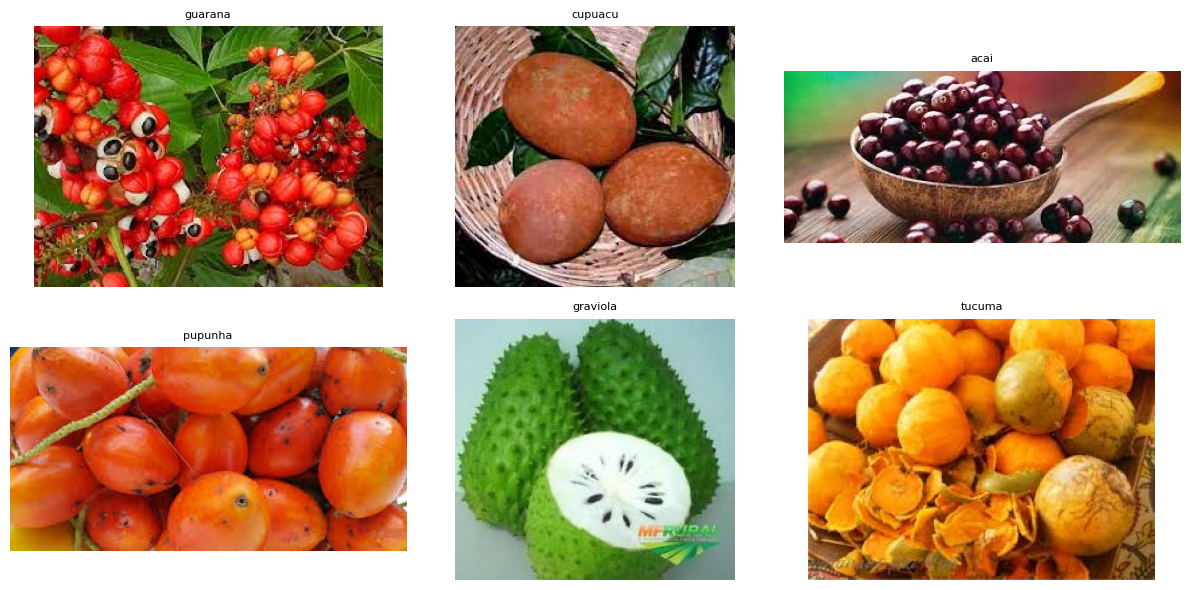

In [4]:
train_folder = '/content/FruitinAmazon/train'

try:
    class_dirs = [d for d in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, d))]

    selected_images = []
    class_labels = []
    for class_dir in class_dirs:
        class_folder = os.path.join(train_folder, class_dir)
        images = [f for f in os.listdir(class_folder) if f.endswith(('jpg', 'jpeg', 'png'))]

        if images:
            random_image = random.choice(images)
            image_path = os.path.join(class_folder, random_image)
            selected_images.append(image_path)
            class_labels.append(class_dir)
        else:
            print(f"Warning: No images found in class directory: {class_dir}")

    num_classes = len(selected_images)
    if num_classes > 0:
        num_rows = 2
        num_cols = (num_classes + num_rows - 1) // num_rows

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
        axes = axes.flatten()

        for i, image_path in enumerate(selected_images):
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(class_labels[i], fontsize=8)

        for j in range(num_classes, num_rows * num_cols):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()
    else:
        print("No class directories with images found in the specified train folder.")

except FileNotFoundError:
    print(f"Error: The train folder '{train_folder}' was not found. Please make sure the path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

What did you Observe?

I observed an image containing six empty plots arranged horizontally. Each plot has axes ranging from 0.0 to 1.0 on both the x and y axes. There are no data points, lines, or any other visual elements within the plots themselves.


Check for Corrupted Image

In [5]:
def find_and_remove_corrupted_images(train_folder):
    """
    Verifies images in the train directory for corruption.
    Removes any corrupted images and prints a message.

    Args:
        train_folder (str): The path to the main training directory.
                           This directory should contain subdirectories,
                           each representing a class of images.
    """
    corrupted_images = []
    for class_dir in os.listdir(train_folder):
        class_path = os.path.join(train_folder, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    img = Image.open(image_path)
                    img.verify()  # Verify the image file is intact
                    img.close()
                except (IOError, SyntaxError) as e:
                    print(f"Found corrupted image: {image_path} - {e}")
                    os.remove(image_path)
                    corrupted_images.append(image_path)
                except Exception as e:
                    print(f"An unexpected error occurred while checking {image_path}: {e}")

    if corrupted_images:
        print("\n--- Corrupted Images Removed ---")
        for img_path in corrupted_images:
            print(f"Removed corrupted image: {img_path}")
    else:
        print("No Corrupted Images Found.")

if __name__ == "__main__":
    train_directory = '/content/FruitinAmazon/train'
    find_and_remove_corrupted_images(train_directory)

No Corrupted Images Found.


# Task 2: Loading and Preprocessing Image Data in keras


In [6]:
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

train_dir = '/content/FruitinAmazon/train'

rescale = tf.keras.layers.Rescaling(1./255)

try:
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=True,
        validation_split=validation_split,
        subset='training',
        seed=123
    )

    train_ds = train_ds.map(lambda x, y: (rescale(x), y))

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=False,
        validation_split=validation_split,
        subset='validation',
        seed=123
    )

    val_ds = val_ds.map(lambda x, y: (rescale(x), y))

    print("Training Dataset:")
    for image_batch, labels_batch in train_ds.take(1):
        print(f"  Image batch shape: {image_batch.shape}")
        print(f"  Labels batch shape: {labels_batch.shape}")
        print(f"  Example labels: {labels_batch.numpy()}")

    print("\nValidation Dataset:")
    for image_batch, labels_batch in val_ds.take(1):
        print(f"  Image batch shape: {image_batch.shape}")
        print(f"  Labels batch shape: {labels_batch.shape}")
        print(f"  Example labels: {labels_batch.numpy()}")

    class_names = train_ds.class_names
    print(f"\nClass names: {class_names}")

except FileNotFoundError:
    print(f"Error: The directory '{train_dir}' was not found. Please make sure the path is correct.")
except Exception as e:
    print(f"An error occurred: {e}")

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Training Dataset:
  Image batch shape: (32, 128, 128, 3)
  Labels batch shape: (32,)
  Example labels: [1 0 5 4 4 5 2 3 0 4 0 3 3 3 0 0 5 5 2 5 3 4 2 1 5 0 2 4 3 0 1 1]

Validation Dataset:
  Image batch shape: (18, 128, 128, 3)
  Labels batch shape: (18,)
  Example labels: [4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
An error occurred: '_MapDataset' object has no attribute 'class_names'


# Task 3 - Implement a CNN

In [7]:
def create_cnn_model(num_classes, input_shape=(128, 128, 3)):
    """
    Creates a Convolutional Neural Network (CNN) model with the specified architecture.

    Args:
        num_classes (int): The number of output classes for the classification task.
        input_shape (tuple): The expected input shape of the images (height, width, channels).
                             Defaults to (128, 128, 3) for RGB images.

    Returns:
        tf.keras.Model: The compiled CNN model.
    """
    model = models.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', strides=(1, 1),
                      activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1, 1),
                      activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        layers.Flatten(),

        layers.Dense(units=128, activation='relu'),

        layers.Dense(units=num_classes, activation='softmax')
    ])
    return model

if __name__ == '__main__':
    num_classes = 10
    input_shape = (128, 128, 3)

    cnn_model = create_cnn_model(num_classes, input_shape)

    cnn_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,409,418 (32.08 MB)

 Trainable params: 8,409,418 (32.08 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4: Compile the Model

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#Compile the module
cnn_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

checkpoint_cb = ModelCheckpoint(
    "best_model.h5", monitor="val_accuracy", save_best_only=True, verbose=1
)
early_stopping_cb = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True, verbose=1
)

#Train the module
history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 894ms/step - accuracy: 0.1742 - loss: 2.8404
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.1793 - loss: 2.9305 - val_accuracy: 0.0000e+00 - val_loss: 5.2420
Epoch 2/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1875 - loss: 3.6920
Epoch 2: val_accuracy did not improve from 0.00000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2669 - loss: 3.0881 - val_accuracy: 0.0000e+00 - val_loss: 2.7357
Epoch 3/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3750 - loss: 1.6023
Epoch 3: val_accuracy improved from 0.00000 to 0.66667, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.3819 - loss: 1.5669 - val_accuracy: 0.6667 - val_loss: 1.3589
Epoch 4/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6875 - loss: 1.2709
Epoch 4: val_accuracy did not improve from 0.66667
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7313 - loss: 1.1918 - val_accuracy: 0.3889 - val_loss: 1.1155
Epoch 5/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7500 - loss: 0.8855
Epoch 5: val_accuracy improved from 0.66667 to 0.88889, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.8003 - loss: 0.7580 - val_accuracy: 0.8889 - val_loss: 0.6661
Epoch 6/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8438 - loss: 0.5151
Epoch 6: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8385 - loss: 0.5252 - val_accuracy: 0.6667 - val_loss: 0.7043
Epoch 7/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.8750 - loss: 0.3356
Epoch 7: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8602 - loss: 0.3685 - val_accuracy: 0.7778 - val_loss: 0.5773
Epoch 8/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9688 - loss: 0.1787
Epoch 8: val_accuracy improved from 0.88889 to 0.94444, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.9705 - loss: 0.1730 - val_accuracy: 0.9444 - val_loss: 0.3518
Epoch 9/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.1009
Epoch 9: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9891 - loss: 0.1053 - val_accuracy: 0.8333 - val_loss: 0.3586
Epoch 10/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0277
Epoch 10: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0300 - val_accuracy: 0.9444 - val_loss: 0.4171
Epoch 11/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0549
Epoch 11: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0535 - val_accuracy: 0.8889 - val_loss: 0.4249
Epoch 12/250
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0165
Epoch 12: val_accuracy did not improve from 0.944

# Task 5: Evaluate the Model

In [9]:
# Load and preprocess test data (similar to how train_ds and val_ds are created)
test_dir = '/content/FruitinAmazon/test'  # Assuming you have a separate test directory

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,  # No need to shuffle test data
)

# Rescale pixel values for the test dataset
test_dataset = test_dataset.map(lambda x, y: (rescale(x), y))

# Now evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(test_dataset, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step - accuracy: 0.8333 - loss: 0.9582
Test Accuracy: 0.8333
Test Loss: 0.9582


# Task 6: Save and Load the Model

In [10]:
from tensorflow.keras.models import load_model # Import the load_model function

cnn_model.save("my_cnn_model.h5")
print("Model saved successfully!")

loaded_model = load_model("my_cnn_model.h5")  # Now you can use load_model
print("Model loaded successfully!")


test_loss, test_accuracy = loaded_model.evaluate(test_dataset, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Model saved successfully!
Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - accuracy: 0.8333 - loss: 0.9582
Test Accuracy: 0.8333
Test Loss: 0.9582


# Task 7: Predictions and Classification Report

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      1.00      1.00         5
           2       0.67      0.80      0.73         5
           3       1.00      0.80      0.89         5
           4       0.83      1.00      0.91         5
           5       1.00      0.40      0.57         5

    accuracy                           0.83        30
   macro avg       0.87      0.83      0.82        30
weighted avg       0.87      0.83      0.82        30



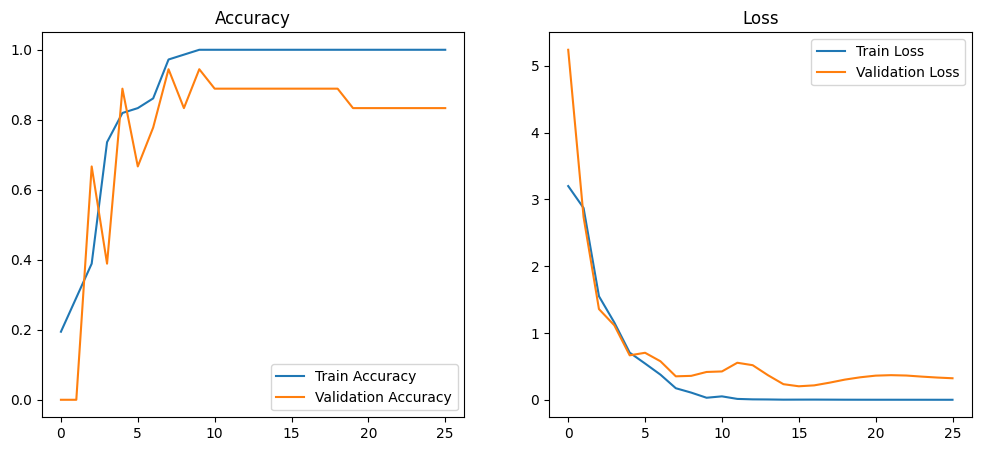

In [11]:
y_pred_probs = loaded_model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = []
for images, labels in test_dataset:
    y_true.extend(labels.numpy())

!pip install scikit-learn
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_true, y_pred))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

# Week 6

# Artificial Intelligence and Machine Learning. Practical Aspects of Training CNN for Image Classification Task.

# Task - 1

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 30 files belonging to 6 classes.
Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,519,494 (24.87 MB)

 Trainable params: 6,518,534 (24.87 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.3763 - loss: 2.2404 - val_accuracy: 0.3000 - val_loss: 1.7386
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.4774 - loss: 1.8054 - val_accuracy: 0.2333 - val_loss: 1.8310
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5126 - loss: 1.4420 - val_accuracy: 0.1667 - val_loss: 2.2065
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.6593 - loss: 0.9700 - val_accuracy: 0.1667 - val_loss: 2.8615
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.5334 - loss: 1.3342 - val_accuracy: 0.1667 - val_loss: 3.5121
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.6194 - loss: 1.4641 - val_accuracy: 0.1667 - val_loss: 4.2582
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.6936 - loss: 0.9523 - val_accuracy: 0.1667 - val_loss: 5.0568
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7431 - loss: 0.9347 - val_accuracy: 0.1667 - val_loss: 6

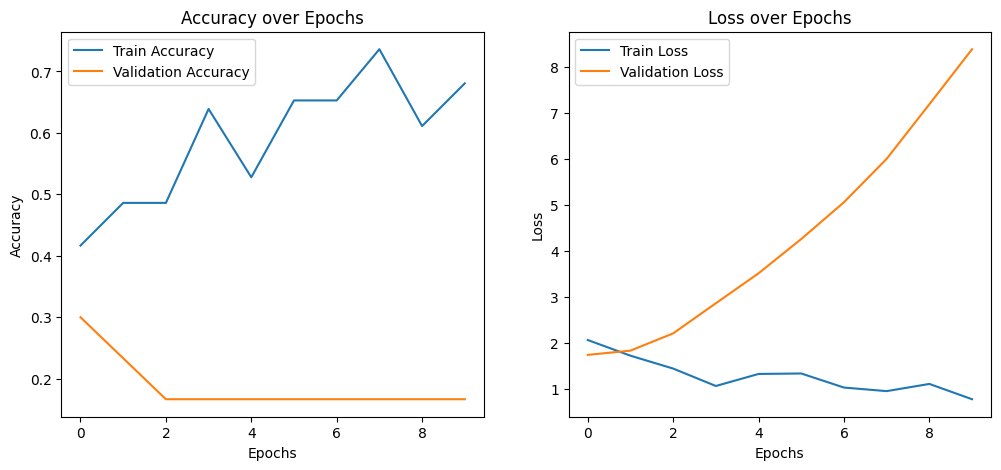

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1667 - loss: 8.3836
Final Test Accuracy: 0.1667


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define dataset paths
train_dir = "/content/FruitinAmazon/train"
val_dir = "/content/FruitinAmazon/test"

# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

# Create a data augmentation layer
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2)
])

# Load training dataset (before applying .map())
raw_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Load validation dataset (without augmentation)
raw_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

# Get class names before transforming dataset
class_names = raw_train_ds.class_names
num_classes = len(class_names)
print(f"Class names: {class_names}")

# Apply augmentation and normalization to training dataset
train_ds = raw_train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
train_ds = train_ds.map(lambda x, y: (layers.Rescaling(1./255)(x), y))

# Normalize validation dataset
val_ds = raw_val_ds.map(lambda x, y: (layers.Rescaling(1./255)(x), y))

# Define a deeper CNN model with Batch Normalization & Dropout
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(img_height, img_width, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation="softmax")  # Output layer
])

# Compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Display model summary
model.summary()

# Train model
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

# Evaluate the final model
test_loss, test_acc = model.evaluate(val_ds)
print(f"Final Test Accuracy: {test_acc:.4f}")

#Task 2

In [13]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np

# Load the pre-trained model (MobileNetV2) with ImageNet weights
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze all layers of the base model
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(class_names), activation='softmax')(x)

# Create the new model
model_transfer = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model_transfer.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
history_transfer = model_transfer.fit(train_ds, validation_data=val_ds, epochs=10)

# Evaluate the model
test_loss, test_acc = model_transfer.evaluate(val_ds)
print(f"Transfer Learning Test Accuracy: {test_acc:.4f}")

# Generate predictions for validation dataset
y_true = np.concatenate([y.numpy() for _, y in val_ds], axis=0)
y_pred = np.argmax(model_transfer.predict(val_ds), axis=1)

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:")
print(report)

# Compare results with the previous model
print("\nComparison:")
print(f"Scratch Model Test Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Test Accuracy: {test_acc:.4f}")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.1437 - loss: 2.6593 - val_accuracy: 0.1667 - val_loss: 2.0972
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.2656 - loss: 2.1410 - val_accuracy: 0.2000 - val_loss: 1.9749
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.2964 - loss: 2.0290 - val_accuracy: 0.2333 - val_loss: 1.8727
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.3494 - loss: 1.9090 - val_accuracy: 0.2000 - val_loss: 1.7937
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.3464 - loss: 1.8250 - val_accuracy: 0.2333 - val_loss: 1.7198
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.2504 - loss: 1.9925 - val_accuracy: 0.3000 - val_loss: 1.6514
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.4362 - loss: 1.4614 - val_accuracy: 0.3667 - val_loss: 1.5855
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.4805 - 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
